## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [584]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [585]:
#Seu Código aqui....
df = pd.read_csv('aptos.csv')
df.head(15)




,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Metros: m² dos apartamentos
- Valor: Valores dos apartamentos em mil (exemplo: 500 corresponde a 500 mil)
- Quartos: Quantidade de quartos nos apartamentos
- Vagas: Quantidade de vagas por apartamentos
- Reformado: Indica se o apartamento foi reformado, sendo 1 pra sim e 0 para não
- Bairro: Bairros onde estão localizados os apartamentos

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina s  obe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.

**Resposta:**

1.  Achamos que a quantidade de quartos influencia no preço dos apartamentos (quanto mais quartos mais caro os apartamentos)
2. Achamos que o bairro é um dos fatores para a definição do preço 

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [587]:

#Seu Código aqui...
#1-Valor com metros e sua média de valor
#referencias: Nathan, conheço SBC e https://www.mbigucci.com.br/blog/melhores-bairros-de-sao-bernardo-do-campo/
df.groupby('metros')['valor'].mean()


metros
43     300.000000
45     215.000000
48     217.000000
49     196.000000
50     210.400000
51     249.000000
52     272.000000
53     261.000000
54     258.500000
55     244.400000
56     242.000000
57     238.500000
58     197.500000
60     360.000000
62     275.000000
64     286.333333
65     320.000000
67     250.000000
68     300.000000
70     338.666667
71     322.666667
73     365.000000
74     259.000000
77     390.000000
80     399.800000
81     485.000000
84     509.000000
85     580.000000
86     460.000000
88     520.000000
90     480.000000
91     545.000000
92     560.000000
93     465.166667
94     515.000000
100    504.800000
104    480.000000
105    659.000000
106    611.500000
107    545.000000
113    525.000000
116    750.000000
130    875.000000
140    635.000000
147    798.000000
150    807.500000
199    880.000000
Name: valor, dtype: float64

In [588]:
df.groupby('metros')['valor'].max() #Maiores valores de apartamento

metros
43     300
45     215
48     217
49     196
50     245
51     249
52     272
53     302
54     289
55     280
56     249
57     250
58     200
60     360
62     330
64     315
65     350
67     250
68     300
70     367
71     410
73     365
74     259
77     390
80     485
81     485
84     509
85     580
86     460
88     520
90     480
91     545
92     560
93     518
94     570
100    605
104    515
105    659
106    710
107    650
113    525
116    750
130    875
140    635
147    798
150    825
199    880
Name: valor, dtype: int64

[Text(0.5, 0, 'Valor (mil)'), Text(0, 0.5, 'Quartos')]

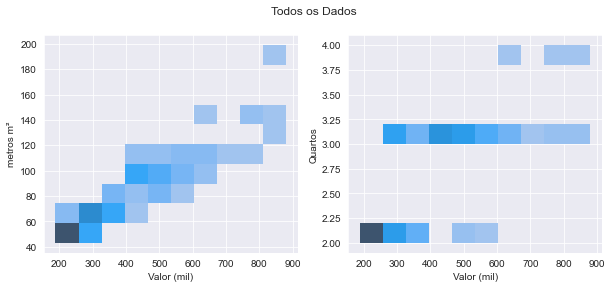

In [589]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Todos os Dados')




sns.histplot(ax=axes[0],
y = df['metros'],
x = df['valor'],
kde=True,
bins=10,
linewidth=0.7,
)



sns.histplot(ax=axes[1],
y = df['quartos'],
x = df['valor'],
kde=True,
bins=10,
linewidth=0.7,
)



axes[0].set(xlabel='Valor (mil)', ylabel='metros m²')
axes[1].set(xlabel='Valor (mil)', ylabel='Quartos')

<AxesSubplot:xlabel='valor', ylabel='metros'>

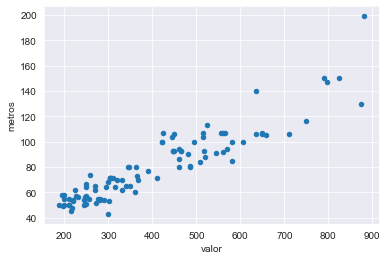

In [590]:
df.plot.scatter('valor', 'metros')

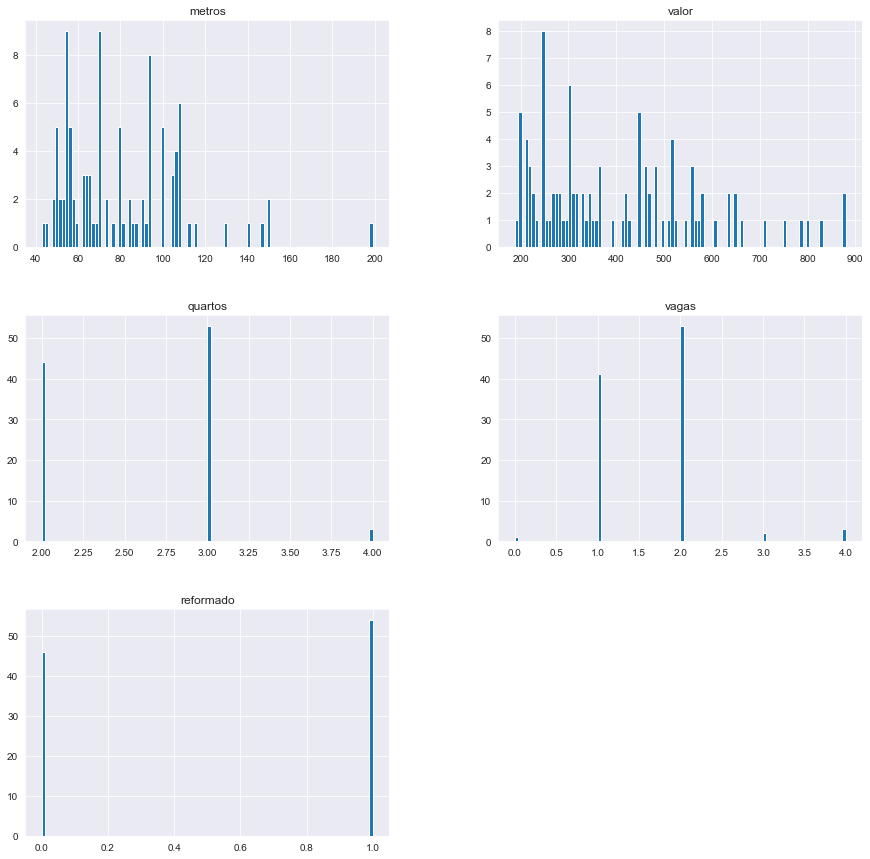

In [591]:
df.hist(bins=100, figsize=(15, 15))
plt.show()



In [592]:
#Seu Código aqui...
#Quartos - Valor
#valor com a média de quartos e seu valor
df.groupby('quartos')['valor'].mean()


quartos
2    274.750000
3    488.509434
4    771.000000
Name: valor, dtype: float64

In [593]:
df.groupby('quartos')['valor'].max()

quartos
2    570
3    875
4    880
Name: valor, dtype: int64

<AxesSubplot:xlabel='quartos', ylabel='valor'>

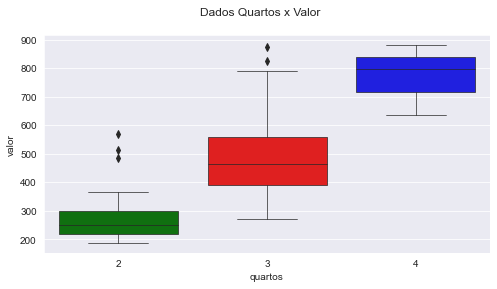

In [594]:
fig, axes = plt.subplots(figsize=(8, 4))
fig.suptitle('Dados Quartos x Valor')

sns.boxplot(x="quartos", y="valor",
palette=["g", "r","b"],
linewidth=0.7,
data=df
)

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 
Foram localizados outliers, cerca de 7. O método de análise adotado foi o Elliptic Envelope. Os dados não foram tratados

Text(0.5, 1.0, 'Elliptic Envelope Outlier Detection')

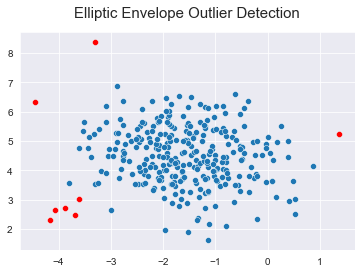

In [595]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
sns.set_style("darkgrid")

# Make a simulated dataset with 2 features
# Normally distributed dataset
X, _ = make_blobs(n_samples=300, n_features=2,
                  centers=1, shuffle=True, random_state=1)

elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]

# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15, pad=15)

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão linear
2. RandomForest

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo ...Regressão Linear busca utilizar a melhor linha reta para obter o melhor resultado
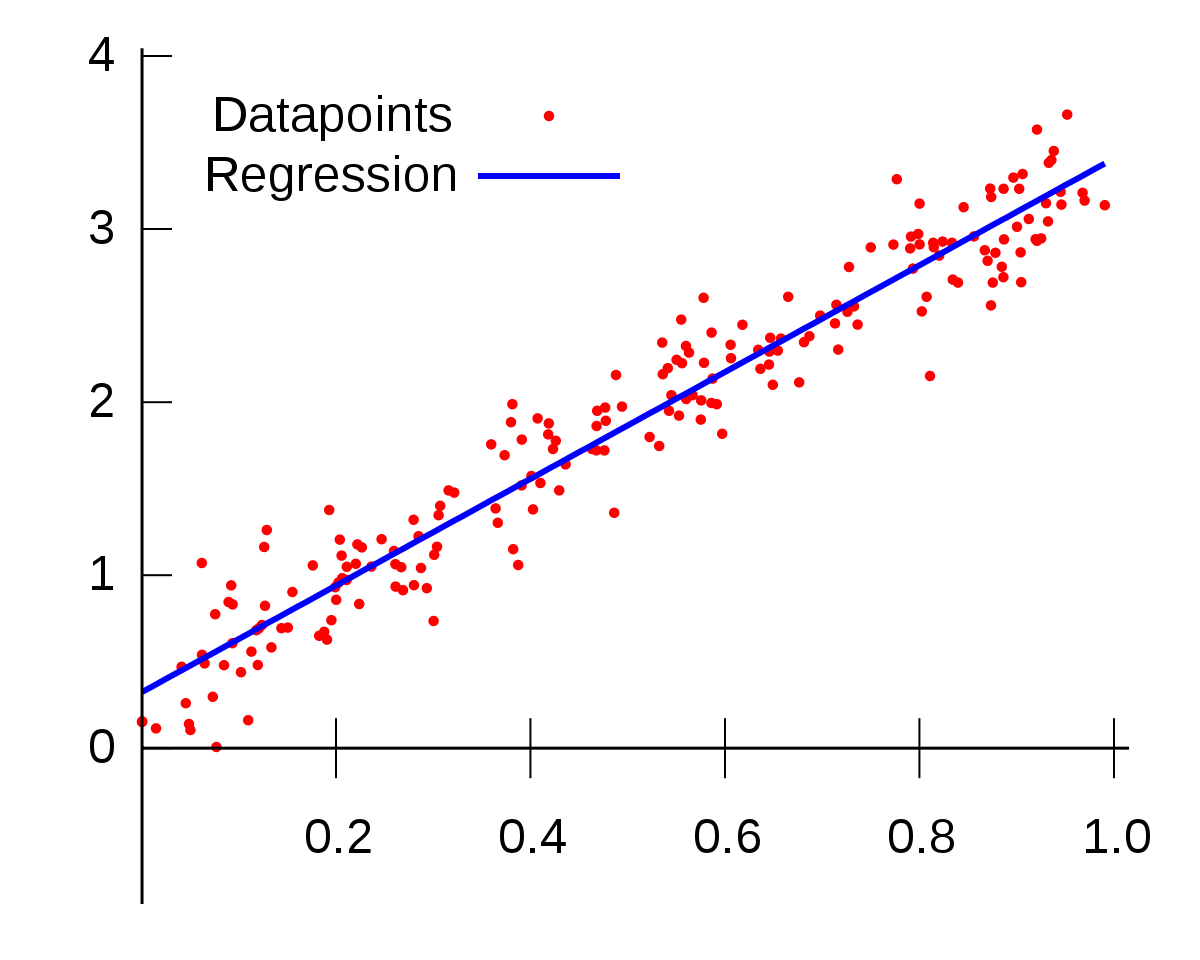
2. algoritimo ...RandomForest é como uma sequência de condicionais (if, else), onde o nós vão testando uma determinada condição com várias árvores. Na imagem abaixo é possível ver, aqueles que tem um filho são os nós pais e vão testando as condicionais e um conjunto de árvores. A melhor é escolhida fazendo a moda delas
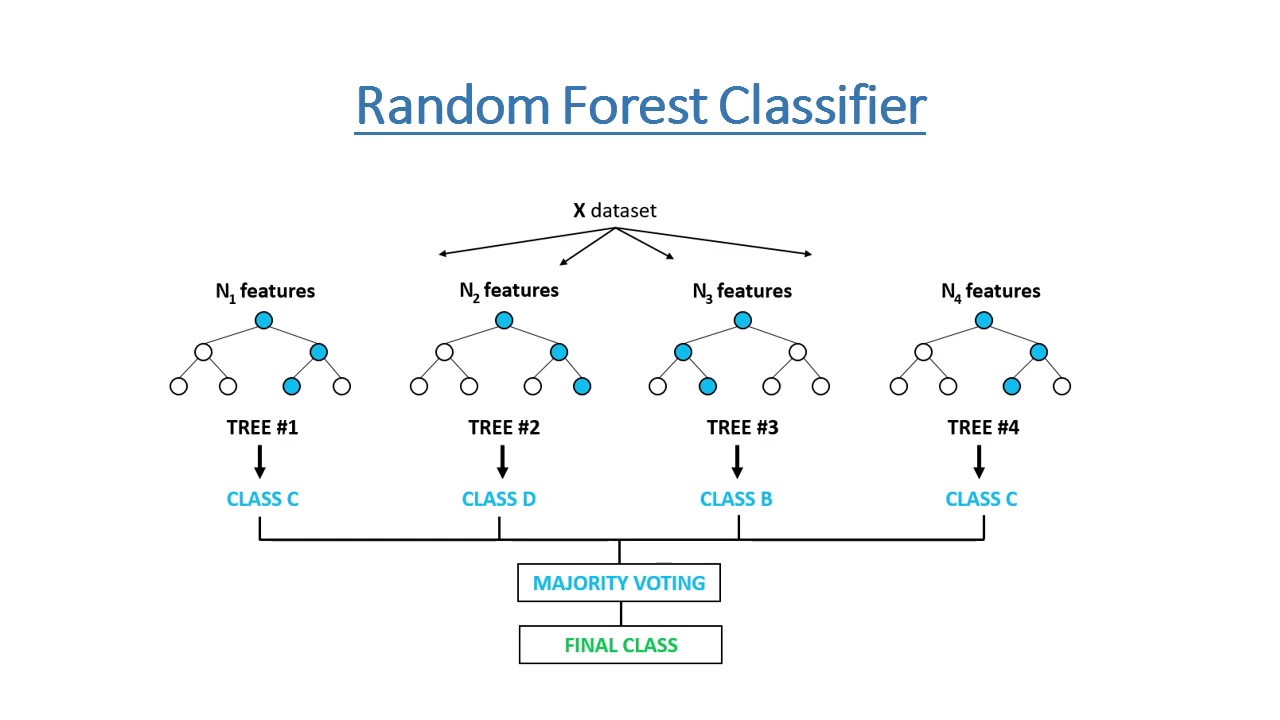

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [596]:
#Seu Código aqui...
from sklearn.model_selection import train_test_split

In [597]:
from sklearn.linear_model import LinearRegression #Tipo de análise que será feita (Regressão aqui)

In [598]:
from sklearn.metrics import r2_score

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1
- quarto para valor

In [599]:
df.head()

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania


In [600]:
#Seu Código aqui...
x = df[['quartos', 'vagas', 'metros']]
y = df['valor']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

In [601]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [602]:
y_predicoes = lr.predict(x_test)

Text(0, 0.5, 'Valor Predito')

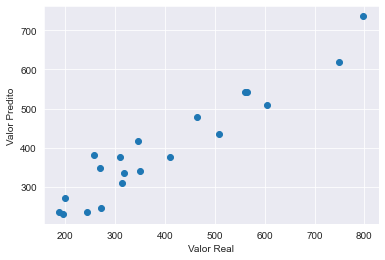

In [603]:
plt.scatter(y_test,y_predicoes)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

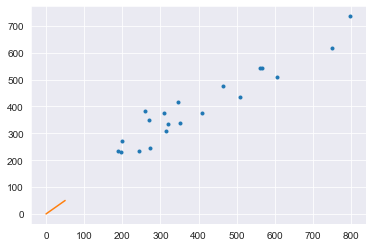

In [604]:
y_predicoes = lr.predict(x_test)

plt.plot(y_test, y_predicoes, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

In [605]:
R2 = r2_score(y_true = y_test,
y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.8747991415212107


In [606]:
df.head()

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania


In [607]:
lr.predict([[3, 2, 60]]) 

array([325.03041324])

In [608]:
lr.predict([[2, 1, 110]])

array([513.27589411])

## RandomForest

In [609]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_predicoes = rf.predict(x_test) 

In [610]:
R2 = r2_score(y_true = y_test,
y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.7147510067561931


### Algoritmo 2 - metros x valor

In [611]:
#Seu Código aqui...
x = df[['metros', 'vagas']]
y = df['valor']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [612]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [613]:
y_predicoes = lr.predict(x_test)

Text(0, 0.5, 'Valor Predito')

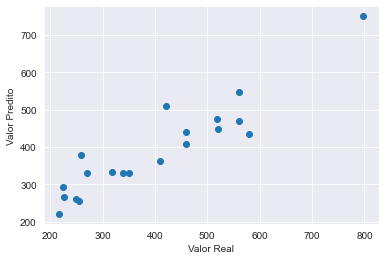

In [614]:
plt.scatter(y_test,y_predicoes)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

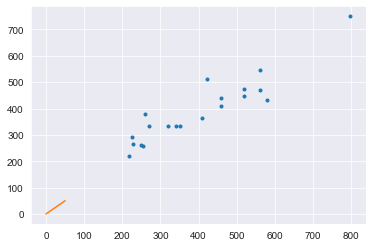

In [615]:
y_predicoes = lr.predict(x_test)

plt.plot(y_test, y_predicoes, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

In [616]:
R2 = r2_score(y_true = y_test,
y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.834668922612961


## RandomForest

In [617]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_predicoes = rf.predict(x_test) 

In [618]:
R2 = r2_score(y_true = y_test,
y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.8200239158812431


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | x | X |
| teste  | 0.87 | 0.71 | 0.83 | 0.82 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [619]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x = df['bairro']
y = label_encoder.fit_transform(x)

In [620]:
df['bairro_id'] = y.tolist()

In [621]:
#Seu Código aqui...
x = df.drop(columns = ['bairro', 'valor'])
y = df['valor']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 49)

In [622]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [623]:
y_predicoes = lr.predict(x_test)

In [624]:
R2 = r2_score(y_true = y_test,
y_pred = y_predicoes)
print('R2: ', R2)

R2:  0.9174293576549899


In [625]:
lr.predict([[65, 2, 2, 1, 2]]) 

array([323.95101574])

## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Acreditamos que sim. Poderiamos ter experimentado mais, mas passamos muito tempo pensando em como fazer invés de estar fazendo, quebrando a cabeça e tentando. Porém, de forma geral estamos satisfeitos com o modelo desenvolvido.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Tentar mais parametros, diferentes algoritmos.
